## Oil Price Analysis

### Training LSTM model

#### Importing necessary libraries

In [1]:
%load_ext autoreload
%autoreload 2

import os
import sys
import pandas as pd
import numpy as np 
import pprint
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, LSTM, Dense, Bidirectional
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping 
from tensorflow.keras.metrics import RootMeanSquaredError,MeanAbsoluteError
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.optimizers import Adam

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler


import tensorflow as tf
import yaml

sns.set_theme('notebook')

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
parent_dir = os.path.dirname(os.getcwd())
os.chdir(parent_dir)
sys.path.append(parent_dir)

In [4]:
from src.data.data_stage import Data
from src.features.featurize import Featurize
from src.train.train_model import ModelTrain
from src.evaluate.evaluate import evaluate_metrics
from src.reports.visualize import plot_metrics


data_stage = Data(config_path="params.yaml")
feature_stage = Featurize(config_path='params.yaml')
model_stage = ModelTrain(config_path='params.yaml')

In [5]:
with open("params.yaml") as conf_file:
    config = yaml.safe_load(conf_file)

# pprint.pprint(config)

### Load Dataset

In [6]:
data = data_stage.data_load()
data.head()


2024-11-16 13:06 - INFO :: Loading data took 0.07


,Price
Date,
20-May-87,18.63
21-May-87,18.45
22-May-87,18.55
25-May-87,18.60
26-May-87,18.63


In [7]:
train, test = data_stage.data_split()

2024-11-16 13:06 - INFO :: Loading data took 0.01
2024-11-16 13:06 - INFO :: Data successfully splited


### Feature Engineering 

In [8]:
X_train, y_train, X_test, y_test = feature_stage.create_sequence()

2024-11-16 13:06 - INFO :: Loading data took 0.01
2024-11-16 13:06 - INFO :: Successfully scaled train, test split.
2024-11-16 13:06 - INFO :: Successfully created sequence for LSTM model


### Model Training

In [9]:
history, model = model_stage.train_model()

2024-11-16 13:06 - INFO :: Start training LSTM model...
2024-11-16 13:06 - INFO :: Loading data took 0.01
2024-11-16 13:06 - INFO :: Successfully scaled train, test split.
2024-11-16 13:06 - INFO :: Successfully created sequence for LSTM model
2024-11-16 13:06 - INFO :: Setting up Mlflow
2024-11-16 13:06 - INFO :: Found existing experiment name: oil-price-Data-forecasting


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 64)             │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 8)              │           520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,425 (68.07 KB)

 Trainable params: 17,425 (68.07 KB)

 Non-trainable params: 0 (0.00 B)

2024/11/16 13:06:39 WARNING mlflow.utils.autologging_utils: MLflow keras autologging is known to be compatible with 3.0.2 <= keras <= 3.5.0, but the installed version is 3.6.0. If you encounter errors during autologging, try upgrading / downgrading keras to a compatible version, or try upgrading MLflow.


2024/11/16 13:10:12 INFO mlflow.tracking._tracking_service.client: 🏃 View run Oil_LSTM at: http://127.0.0.1:5000/#/experiments/157068650475322727/runs/dd2ff658c8cb44f0a3f50a0a3457ab9d.
2024/11/16 13:10:12 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://127.0.0.1:5000/#/experiments/157068650475322727.
2024-11-16 13:10 - INFO :: Training LSTM took 214.05 seconds


### Model evaluating

In [10]:
evaluate_metrics('params.yaml')

2024-11-16 13:10 - INFO :: Loading data took 0.16
2024-11-16 13:10 - INFO :: Successfully scaled train, test split.
2024-11-16 13:10 - INFO :: Successfully created sequence for LSTM model


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Mean Absolute Error (MAE): 0.013249471254334606
Root Mean Squared Error (RMSE): 0.01544487242429998
Mean Absolute Percentage Error (MAPE): 2.0826201214655415%


2024-11-16 13:10 - INFO :: Successfully saved all images


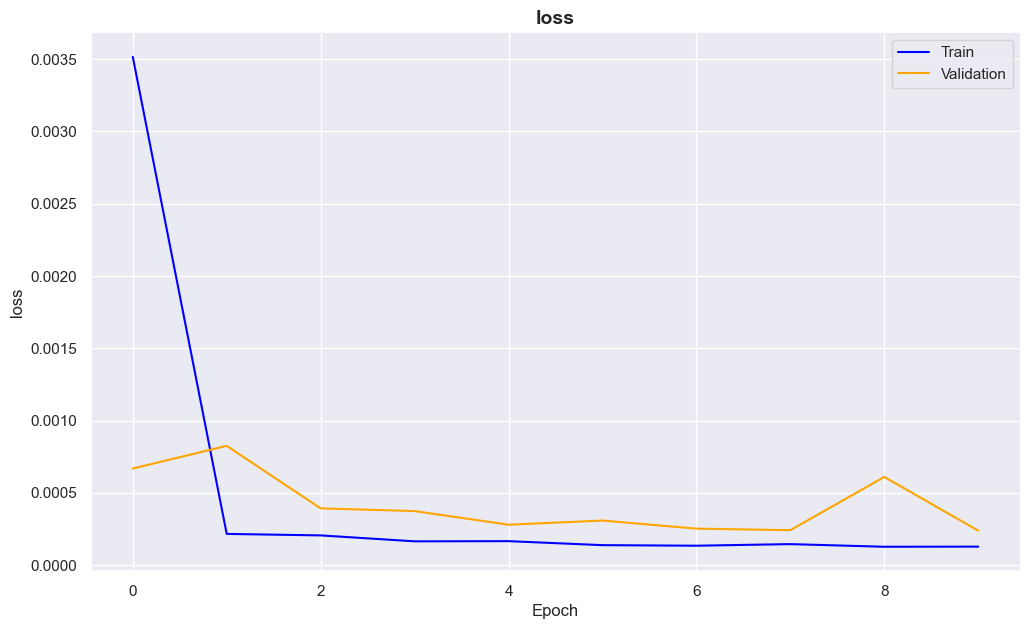

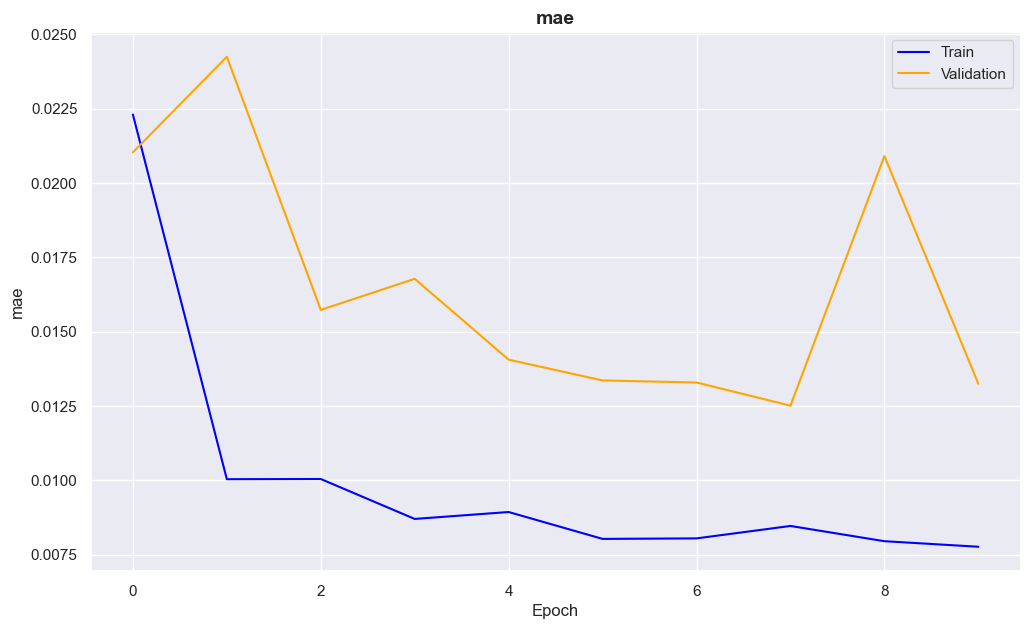

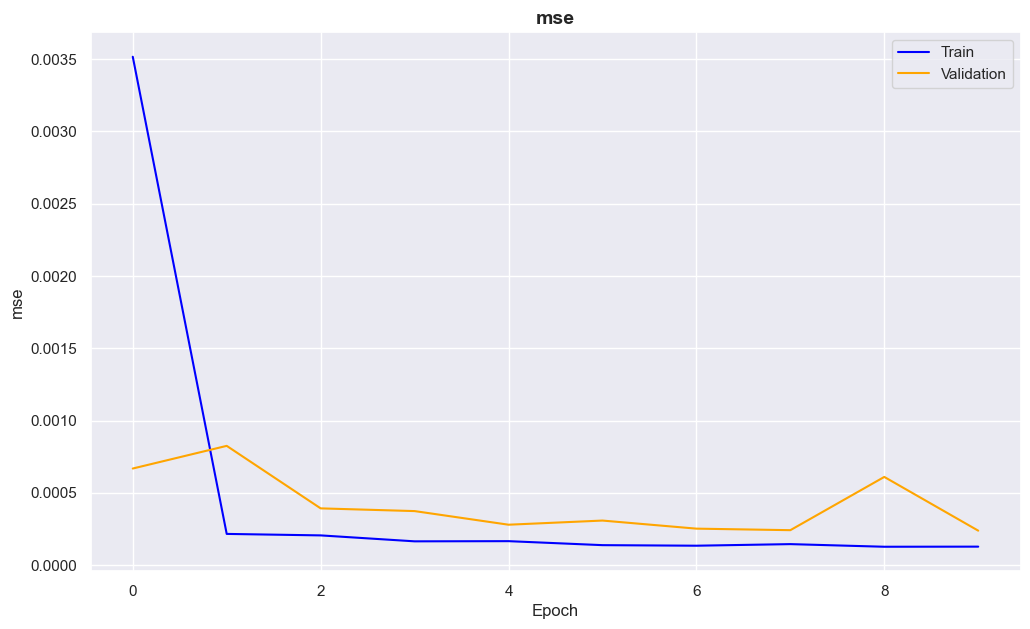

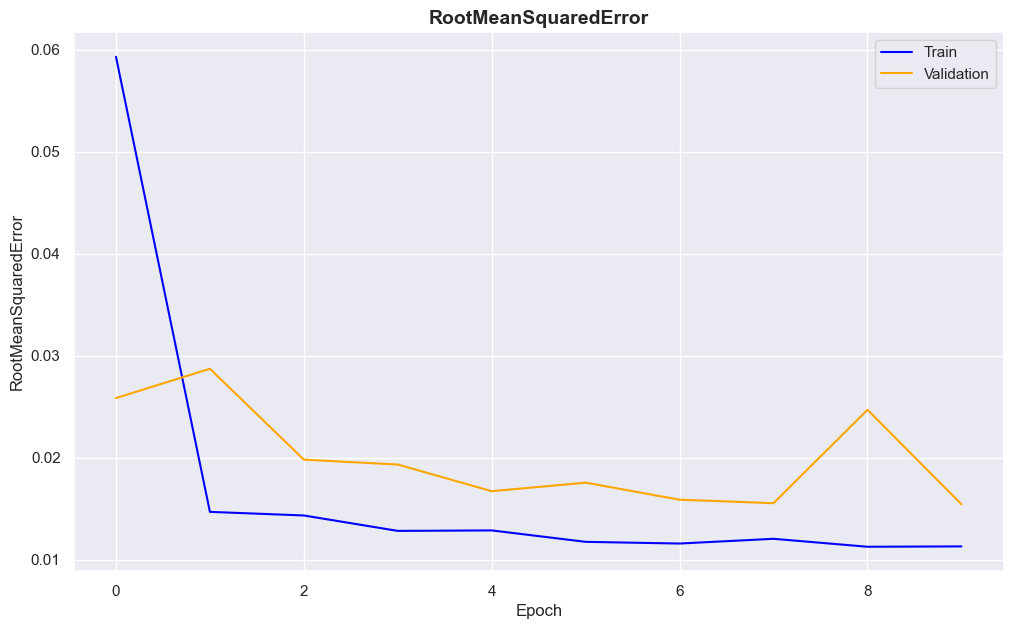

In [11]:
plot_metrics('params.yaml')